In [1]:

import pandas as pd 
import cv2            
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
from keras.utils.np_utils import to_categorical
print(os.listdir("/home/vinicius/Documentos/UTFPR/IA/projeto_ia/Inceptionv3_Pneumonia/chest_xray/chest_xray"))

Using TensorFlow backend.


['.DS_Store', 'test', 'val', 'train']


In [2]:
print(os.listdir("/home/vinicius/Documentos/UTFPR/IA/projeto_ia/Inceptionv3_Pneumonia/chest_xray/chest_xray/train"))


['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [3]:
TRAIN_DIR = "/home/vinicius/Documentos/UTFPR/IA/projeto_ia/Inceptionv3_Pneumonia/chest_xray/chest_xray/train"
TEST_DIR = "/home/vinicius/Documentos/UTFPR/IA/projeto_ia/Inceptionv3_Pneumonia/chest_xray/chest_xray/test"

In [4]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [5]:
def preprocessing_data(Dir):
    x = []
    y = []
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir

        
        #tqdm mostra a quantidade que está carregando(processamento)
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/', image_filename)
            #Lendo imagem em escala de cinza
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                #Especifica um formato de imagem de saida
                img = skimage.transform.resize(img,(150,150,3))
                #retorna a entrada em array
                img = np.asarray(img)
                x.append(img)
                y.append(label)
                print(x)
                print(y)
    
    X = np.asarray(x)
    y = np.asarray(y)

    return X,y
    

In [6]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + '/' + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(299, 299, 3))
                    img = np.asarray(img)
                    X.append(img)
                    #print(X)
                    y.append(label)
                    #print(y)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [7]:
X_train, y_train = get_data(TRAIN_DIR)

  0%|          | 0/1342 [00:00<?, ?it/s]/home/vinicius/Documentos/UTFPR/IA/projeto_ia/local/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/vinicius/Documentos/UTFPR/IA/projeto_ia/local/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 3876/3876 [03:30<00:00, 18.43it/s]


In [8]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 390/390 [00:18<00:00, 21.45it/s]


In [10]:
print(X_train.shape,'\n',X_test.shape)
#X_train

((5216, 150, 150, 3), '\n', (624, 150, 150, 3))


In [11]:
print(y_train.shape,'\n',y_test.shape)

((5216,), '\n', (624,))


In [12]:
from keras.utils.np_utils import to_categorical
#to_categorical transforma a entrada em binario, 2 eh o numero de classe
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [19]:
#Cria uma lista com o nome das imagens
Pimages = os.listdir(TRAIN_DIR + '/' + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + '/' + "NORMAL")

### Plotting the XRays of No Pneumonia and Pneumonia patients

[[[52 52 52]
  [52 52 52]
  [51 51 51]
  ...
  [41 41 41]
  [40 40 40]
  [40 40 40]]

 [[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [41 41 41]
  [40 40 40]
  [40 40 40]]

 [[47 47 47]
  [47 47 47]
  [47 47 47]
  ...
  [41 41 41]
  [41 41 41]
  [40 40 40]]

 ...

 [[22 22 22]
  [22 22 22]
  [22 22 22]
  ...
  [44 44 44]
  [44 44 44]
  [44 44 44]]

 [[21 21 21]
  [22 22 22]
  [22 22 22]
  ...
  [44 44 44]
  [44 44 44]
  [44 44 44]]

 [[21 21 21]
  [21 21 21]
  [21 21 21]
  ...
  [44 44 44]
  [44 44 44]
  [44 44 44]]]
(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


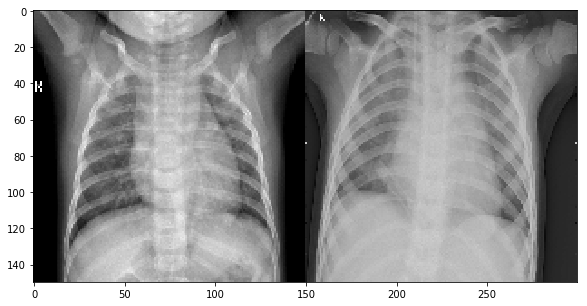

[[[116 116 116]
  [115 115 115]
  [117 117 117]
  ...
  [111 111 111]
  [113 113 113]
  [109 109 109]]

 [[117 117 117]
  [116 116 116]
  [117 117 117]
  ...
  [109 109 109]
  [110 110 110]
  [107 107 107]]

 [[118 118 118]
  [117 117 117]
  [117 117 117]
  ...
  [106 106 106]
  [106 106 106]
  [104 104 104]]

 ...

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]]
(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


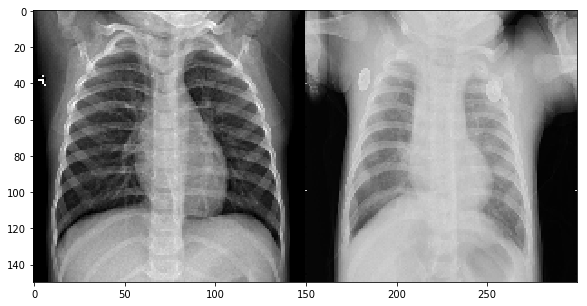

[[[ 25  25  25]
  [ 25  25  25]
  [ 25  25  25]
  ...
  [ 96  96  96]
  [117 117 117]
  [140 140 140]]

 [[ 25  25  25]
  [ 25  25  25]
  [ 25  25  25]
  ...
  [ 83  83  83]
  [104 104 104]
  [127 127 127]]

 [[ 25  25  25]
  [ 25  25  25]
  [ 25  25  25]
  ...
  [ 80  80  80]
  [ 95  95  95]
  [116 116 116]]

 ...

 [[ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 [[ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 [[ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]]
(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


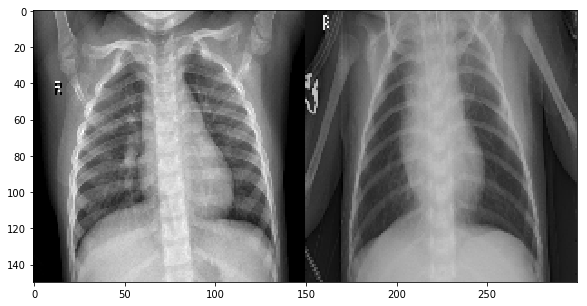

In [35]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR + '/PNEUMONIA/' + Pimages[i])
    print(imagep1)
    imagep1 = skimage.transform.resize(imagep1, (150,150,3), mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR + '/NORMAL/' + Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150,150,3), mode = 'reflect')
    pair = np.concatenate((imagen1, imagep1), axis = 1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(12,15):
    plotter(i)

In [36]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
# reduce learning rate when a metric has stopped improving, 
#monitor = quantity to be monitored
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

**Saving the weights of the best model after checkpointing in transferlearning_weights.hdf5 .**

In [38]:
filepath="transferlearning_weights.hdf5"
#save the model after every epoch
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [40]:
from keras.models import Sequential , Model
from keras.layers import Dense , Activation
from keras.layers import Dropout , GlobalAveragePooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [46]:
#type(X_train)
#np.shape(X_train)
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

**Importing InceptionV3 from Keras but with no weights. Also define the necessary input shape of the resized images which were resized initially. The default image size is 299 X 299 for InceptionV3.**

In [8]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
from keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
#model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)
base_model = InceptionV3(weights=None, include_top=False , input_shape=(3, 150, 150))


ValueError: The input must have 3 channels; got `input_shape=(3, 150, 150)`

In [53]:
# add a global spatial average pooling layer
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)


NameError: name 'base_model' is not defined

In [54]:
base_model.load_weights("../input/inceptionweights/inception_v3_weights.h5")

NameError: name 'base_model' is not defined

In [55]:
model = Model(inputs=base_model.input, outputs=predictions)

NameError: name 'base_model' is not defined